In [1]:
%matplotlib inline
import mprof
import prettyprint
import os
import platform
import cpuinfo
import psutil
import numpy as np
import matplotlib.pyplot as plt

# Context

In [2]:
prettyprint.prettyprint(os.path.expanduser('~/Work/Data/sextractorxx_sim09_r.config'))

In [3]:
prettyprint.size_fmt(os.stat('/home/aalvarez/Work/Data/sim09/sim09_r.fits').st_size)

'37.97 MiB'

```bash
BINARY_TAG=x86_64-fc28-gcc82-o2g
```

In [4]:
cpu = cpuinfo.get_cpu_info()
print(cpu['brand'])
print(f'{cpu["count"]} cores')
print(prettyprint.size_fmt(psutil.virtual_memory().total), 'RAM')
print(platform.platform())

Intel(R) Xeon(R) CPU E3-1505M v6 @ 3.00GHz
8 cores
15.51 GiB RAM
Linux-4.19.16-200.fc28.x86_64-x86_64-with-fedora-28-Twenty_Eight


# Executions

## Single threaded

### Thread-unsafe (no thread specific)

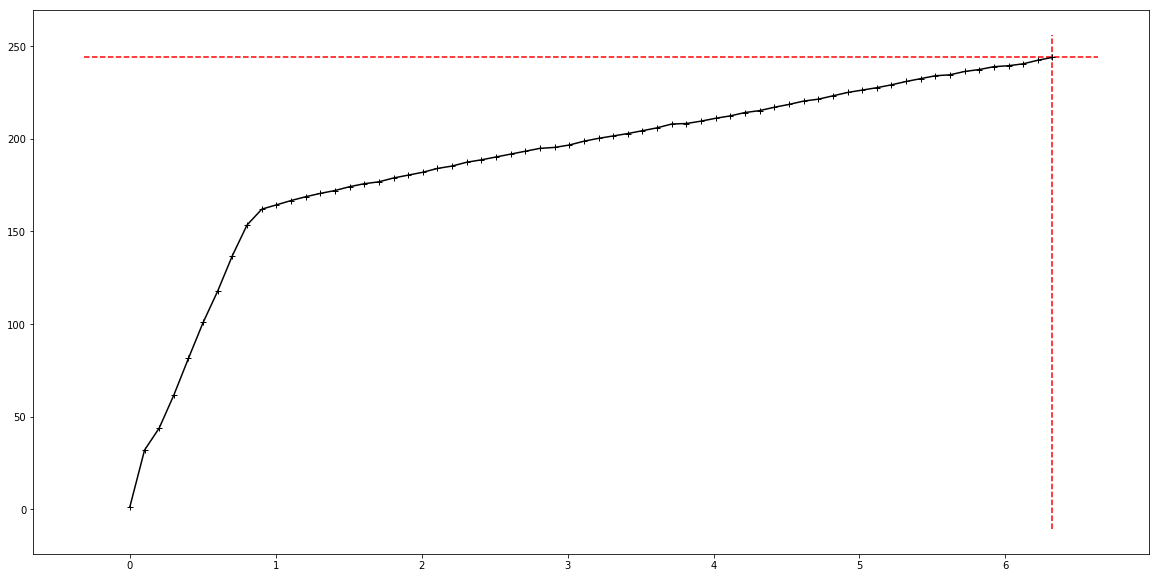

In [5]:
plt.figure(figsize=(20,10))
prof_single_unsafe = mprof.plot_file('mprof_data/mprof_sim09_r_single_unsafe.dat')

### Thread specific

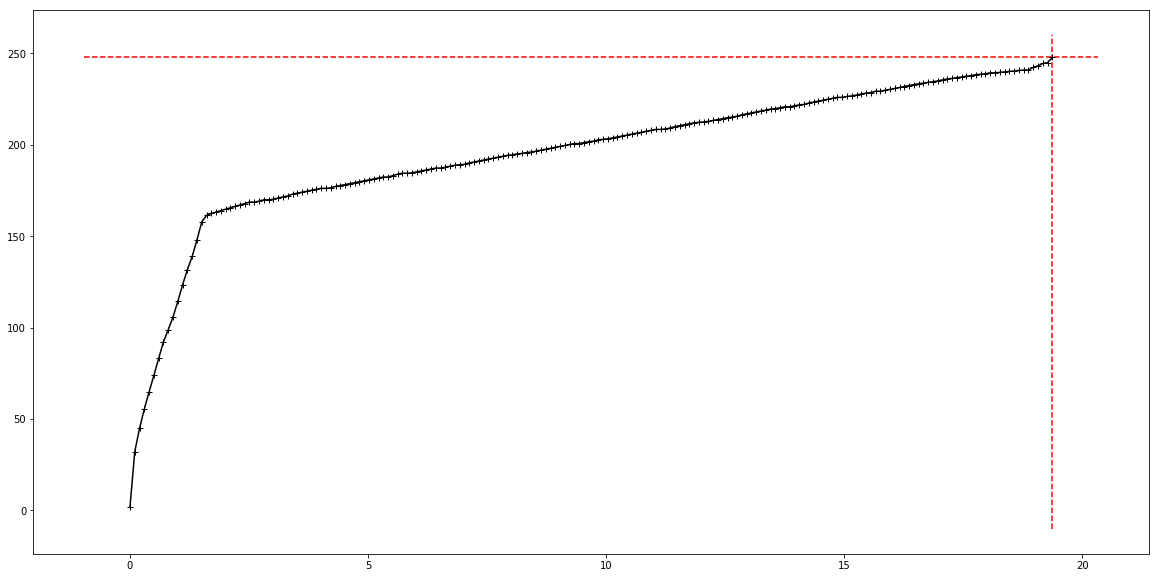

In [6]:
plt.figure(figsize=(20,10))
prof_single_spec = mprof.plot_file('mprof_data/mprof_sim09_r_single_specific.dat')

### getChunk

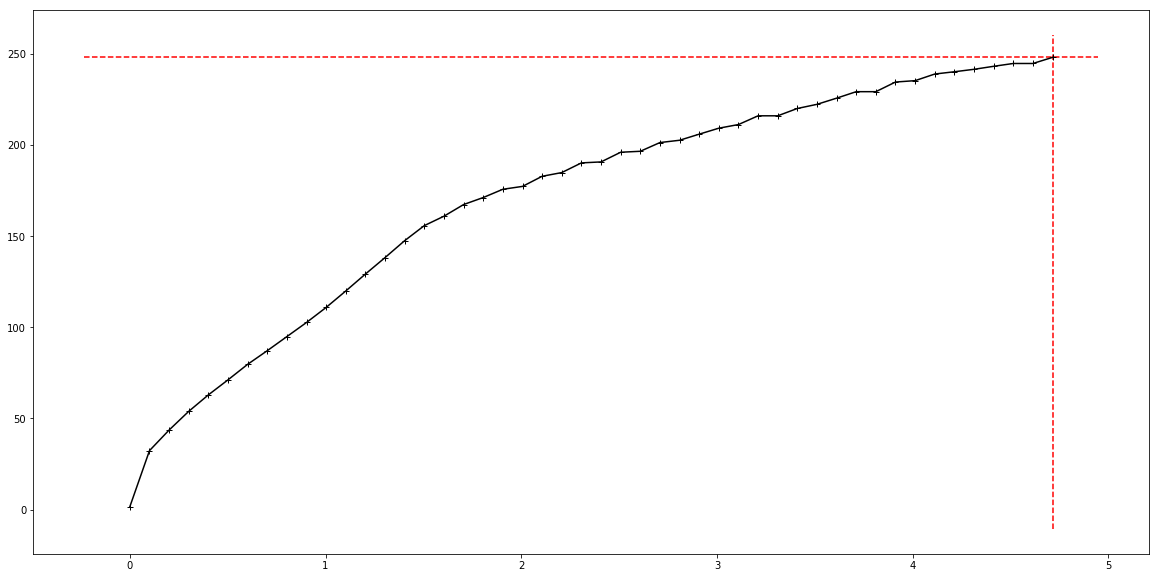

In [7]:
plt.figure(figsize=(20,10))
prof_single_chunk = mprof.plot_file('mprof_data/mprof_sim09_r_single_chunk.dat')

## Multithreaded

### Thread specific

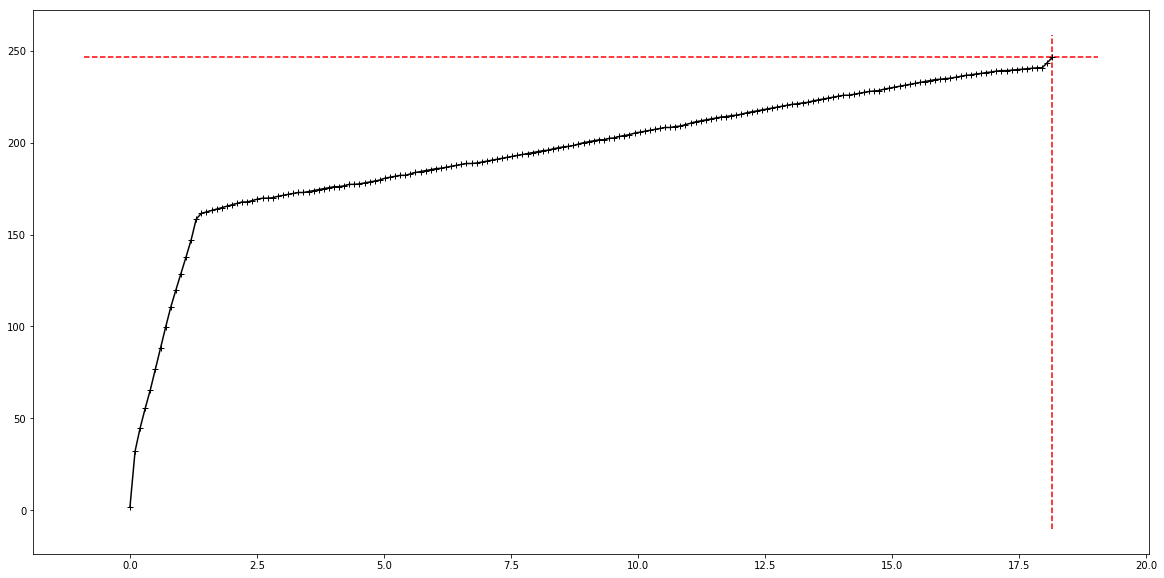

In [8]:
plt.figure(figsize=(20,10))
prof_multi_spec = mprof.plot_file('mprof_data/mprof_sim09_r_multi_specific.dat')

### getChunk

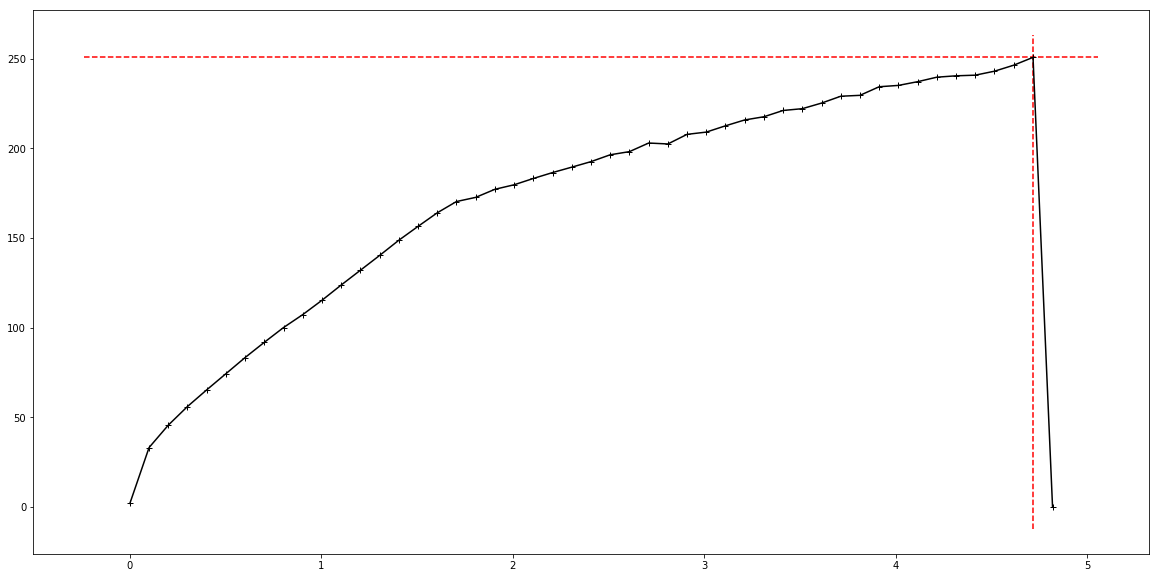

In [9]:
plt.figure(figsize=(20,10))
prof_multi_chunk = mprof.plot_file('mprof_data/mprof_sim09_r_multi_chunk.dat')

## Overview

In [10]:
def duration(prof):
    return np.max(prof['timestamp']) - np.min(prof['timestamp'])

single_unsafe_duration = duration(prof_single_unsafe)
single_spec_duration = duration(prof_single_spec)
single_chunk_duration = duration(prof_single_chunk)
multi_spec_duration = duration(prof_multi_spec)
multi_chunk_duration = duration(prof_multi_chunk)

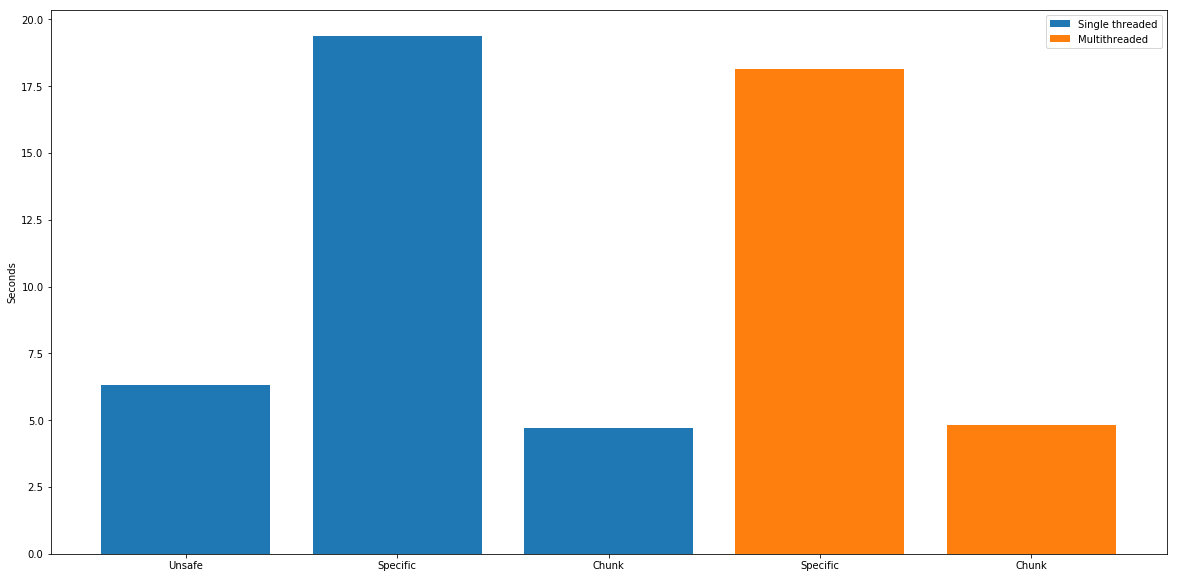

In [11]:
ax = plt.figure(figsize=(20,10)).add_subplot(111)
ax.bar([0,1,2], [single_unsafe_duration, single_spec_duration, single_chunk_duration], label='Single threaded')
ax.bar([3,4], [multi_spec_duration, multi_chunk_duration], label='Multithreaded')
ax.set_xticklabels(['', 'Unsafe', 'Specific', 'Chunk', 'Specific', 'Chunk'])
ax.set_ylabel('Seconds')
_ = plt.legend()